In [96]:
import kagglehub
import pandas as pd
import os
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

# Importing data from Kaggle:

Source: https://www.kaggle.com/datasets/zaireali/metacritic-games-scrape

In [4]:
#Download latest version
path = kagglehub.dataset_download("zaireali/metacritic-games-scrape")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Files in dataset directory:", files)

Path to dataset files: /Users/lillykirby/.cache/kagglehub/datasets/zaireali/metacritic-games-scrape/versions/2
Files in dataset directory: ['dataset_metacritic_scraper_2025-02-15.csv']


# Data exploration and cleaning:

Relevant variables are title, Metascore, user score, publisher, release date, and section

In [79]:
data = os.path.join(path, "dataset_metacritic_scraper_2025-02-15.csv")
df = pd.read_csv(data)

#Examine raw dataset (delete #s from rows below to view all columns):
#pd.set_option('display.max_rows', None)
#display(df)
#pd.reset_option('display.max_rows')

#Rename columns:
df.rename(columns={
    'genres/0': 'genres',
    'publisherName': 'publisher',
    'releaseDate': 'release_date'
}, inplace=True)

#Keep only relevant variables:
df = df[['title', 'metascore', 'userscore', 'publisher', 'release_date', 'section']]

#Output df overview/information:
display(Markdown("**Dataframe Overview**"))
display(df)

display(Markdown("**Dataframe Information**"))
df.info()

#Convert 'metascore' and 'userscore' to numeric:
df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')
df['userscore'] = pd.to_numeric(df['userscore'], errors='coerce')

/var/folders/jy/sfy_3pjd7kjg82dpzkb_vr200000gn/T/ipykernel_2478/3855167236.py:2: DtypeWarning: Columns (2,155,162,163,170,171,178,179,186,195,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


**Dataframe Overview**

,title,metascore,userscore,publisher,release_date,section
0,Tekken 3,96,8.9,Namco,1998-04-29,PlayStation
1,Mass Effect 2,96,8.9,Electronic Arts,2010-01-26,Xbox 360
2,Baldur's Gate 3,96,9.2,Larian Studios Games,2023-08-03,PC
3,The Orange Box,96,8.8,EA Games,2007-10-10,Xbox 360
4,Uncharted 2: Among Thieves,96,8.8,SCEA,2009-10-13,PlayStation 3
...,...,...,...,...,...,...
13424,Family Party: 30 Great Games Obstacle Arcade,11,2.9,D3Publisher,2012-12-04,Wii U
13425,Monster Hunter Wilds,tbd,tbd,Capcom,2025-02-28,PC
13426,SPOGS Racing,18,6.1,D2C Games,2008-07-07,Wii
13427,Ride to Hell: Retribution,19,1.4,Deep Silver,2013-06-25,Xbox 360


**Dataframe Information**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13429 entries, 0 to 13428
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         13429 non-null  object
 1   metascore     13429 non-null  object
 2   userscore     13429 non-null  object
 3   publisher     13427 non-null  object
 4   release_date  13397 non-null  object
 5   section       13429 non-null  object
dtypes: object(6)
memory usage: 629.6+ KB


In [ ]:
#Make sure the date is formatted correctly:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

#Create 'release_year' by extracting the year from release_date:
df['release_year'] = df['release_date'].dt.year

#Compute descriptive statistics:
summary_stats = df[['metascore', 'userscore', 'release_year']].agg(['mean', 'median', 'min', 'max', 'std'])

#Display the table:
display(Markdown("**Summary Statistics**"))
display(summary_stats)

**Summary Statistics**

,metascore,userscore,release_year
mean,70.407018,6.929203,2012.105024
median,72.000000,7.200000,2012.000000
min,11.000000,0.300000,1995.000000
max,99.000000,10.000000,2025.000000
std,12.350829,1.358217,7.025203


In [78]:
#Count occurrences of each genre:
genre_counts = df_exploded['genre'].value_counts()

#Convert data to a dataframe:
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

# Display the 50 most popular genres:
display(Markdown("**Top 50 Genres**"))
display(genre_counts_df.head(50))
display(Markdown("Note: Many games count as more than one genre, and as such can be counted in more than one category."))

**Top 50 Genres**

,Genre,Count
0,Action Adventure,742
1,2D Platformer,675
2,Action RPG,649
3,FPS,579
4,Real-Time Strategy,374
5,JRPG,372
6,Open-World Action,357
7,Adventure,345
8,Survival,330
9,Point-and-Click,315


Note: Many games count as more than one genre, and as such can be counted in more than one category.

# Data Visualization

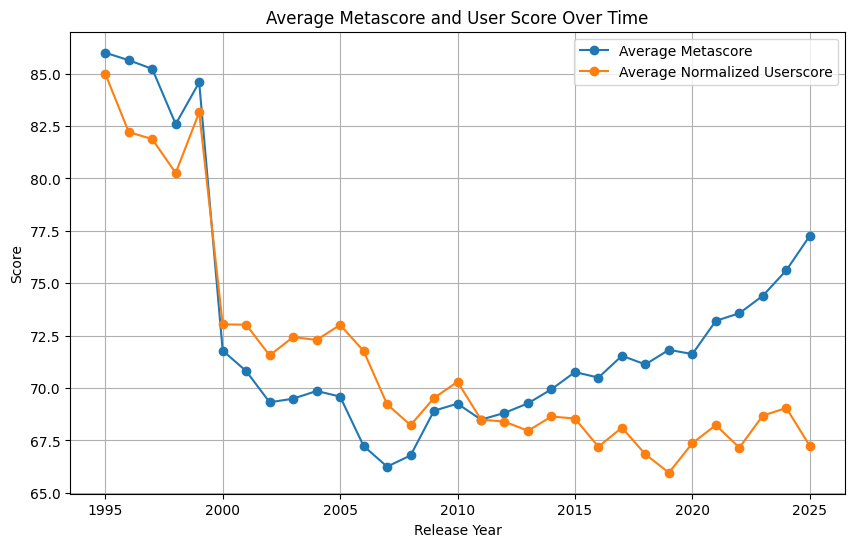

Note: Normalized User Score = User Score * 10

In [ ]:
#Normalize user score for comparison:
df['normalized_userscore'] = 10* df['userscore']

#Group by release_year and calculate the mean for each score:
df_grouped = df.groupby('release_year')[['metascore', 'normalized_userscore']].mean().reset_index()

#Plot the averages over time:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['release_year'], df_grouped['metascore'], marker='o', label='Average Metascore')
plt.plot(df_grouped['release_year'], df_grouped['normalized_userscore'], marker='o', label='Average Normalized Userscore')
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.title('Average Metascore and User Score Over Time')
plt.legend()
plt.grid(True)


plt.show()

display(Markdown('Note: Normalized User Score = User Score * 10'))

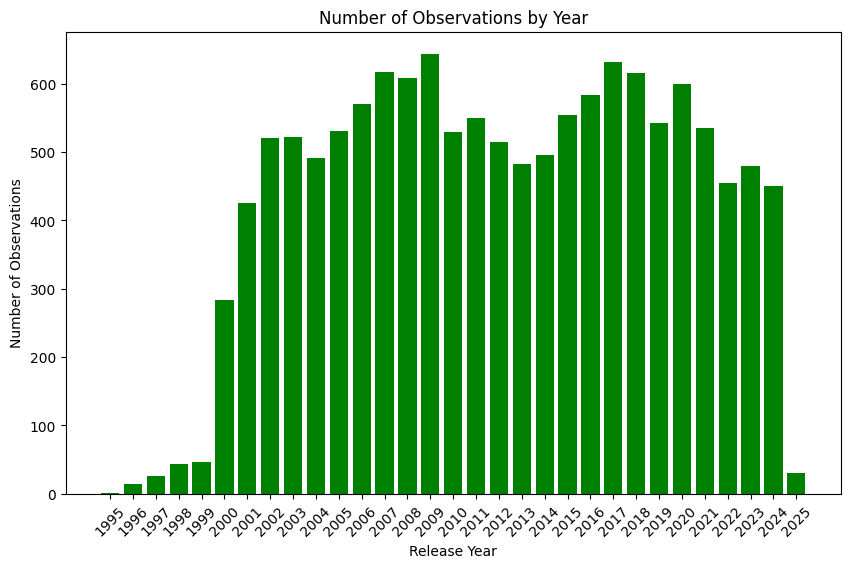

In [127]:
#Number of observations for each release year:
observations_by_year = df.groupby('release_year').size()

#Convert the index to integer:
years = observations_by_year.index.astype(int)

#Create bar chart:
plt.figure(figsize=(10, 6))
plt.bar(years, observations_by_year.values, color = 'green')
plt.xlabel('Release Year')
plt.ylabel('Number of Observations')
plt.title('Number of Observations by Year')
plt.xticks(years, rotation = 45)

plt.show()

**Metascore Data**

score_range
0-9         0
10-19       7
20-29      54
30-39     215
40-49     621
50-59    1501
60-69    3075
70-79    4690
80-89    2892
90-99     367
Name: count, dtype: int64

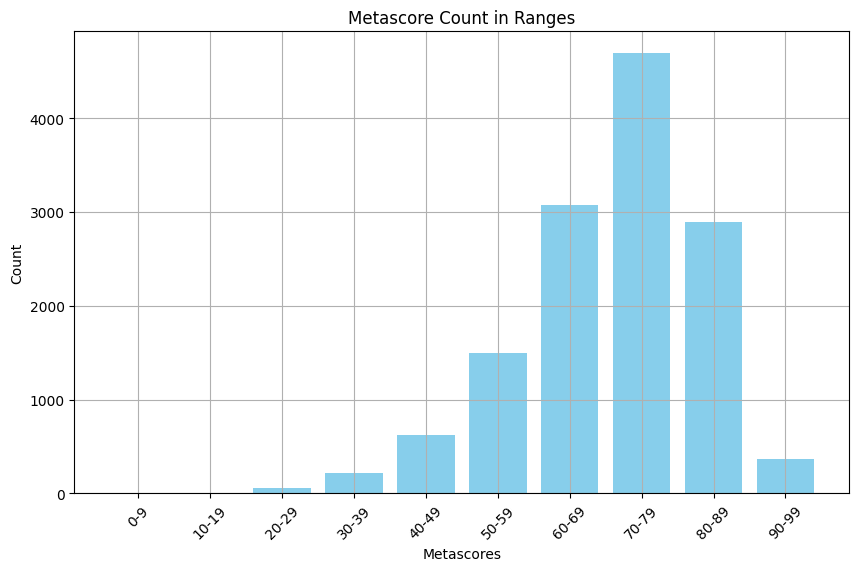

**Normalized User Score Data**

score_range_norm
0-9         6
10-19      62
20-29     109
30-39     288
40-49     581
50-59    1269
60-69    2625
70-79    4206
80-89    2635
90-99     114
Name: count, dtype: int64

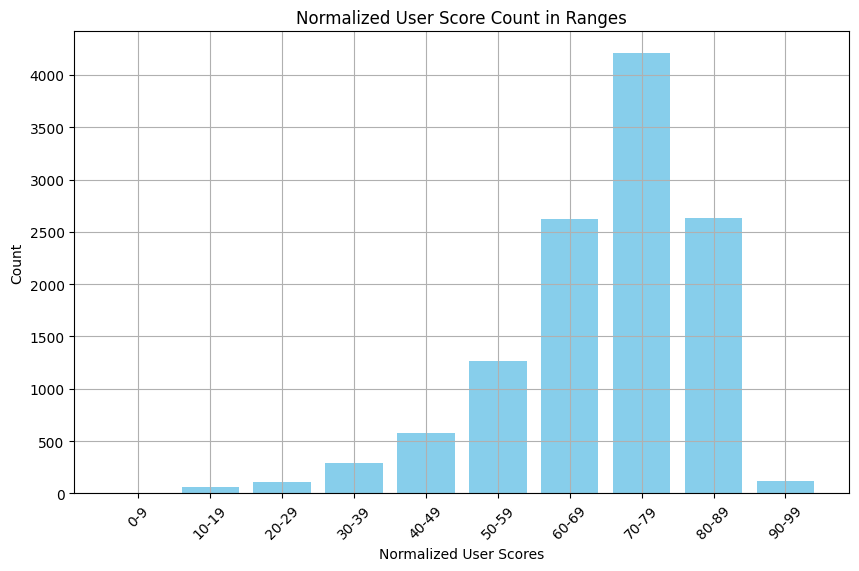

Both metascores and user scores appear to be approximately normally distributed. The user scores tend to have a greater number of lower ratings.

In [135]:
#Define bins and labels:
bins= [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [f"{int(b)}-{int(b+10)-1}" for b in bins[:-1]]

#########################
#Metascore Visualization#
#########################

#Define score range:
df['score_range'] = pd.cut(df['metascore'], bins=bins, right=False, include_lowest=True, labels=labels)

#Count the number of observations in each range:
metascore_counts = df['score_range'].value_counts().sort_index()

#Table:
display(Markdown("**Metascore Data**"))
display(metascore_counts)

#Bar chart:
plt.figure(figsize=(10, 6))
plt.bar(metascore_counts.index, metascore_counts.values, color='skyblue')
plt.xlabel('Metascores')
plt.ylabel('Count')
plt.title('Metascore Count in Ranges')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##########################
#User Score Visualization#
##########################

#Define score range:
df['score_range_norm'] = pd.cut(df['normalized_userscore'], bins=bins, right=False, include_lowest=True, labels=labels)

#Count the number of observations in each range:
norm_userscore_counts = df['score_range_norm'].value_counts().sort_index()

#Table:
display(Markdown("**Normalized User Score Data**"))
display(norm_userscore_counts)

#Bar chart:
plt.figure(figsize=(10, 6))
plt.bar(norm_userscore_counts.index, norm_userscore_counts.values, color='skyblue')
plt.xlabel('Normalized User Scores')
plt.ylabel('Count')
plt.title('Normalized User Score Count in Ranges')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Conclusions:
display(Markdown("Both metascores and user scores appear to be approximately normally distributed. The user scores tend to have a greater number of lower ratings."))